In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('Data/pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/(x.max()-x.min()))

In [7]:
diabetes

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C
...,...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,63,0,B
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,27,0,A
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,30,0,C
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,47,1,C


In [8]:
import tensorflow as tf

In [9]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [11]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

In [12]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

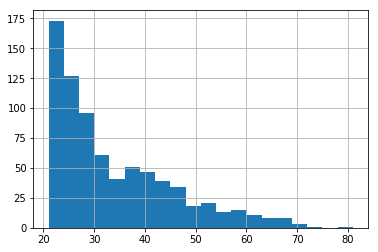

In [14]:
diabetes['Age'].hist(bins=20)

In [15]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [16]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group, age_bucket]

In [17]:
# TRAIN TEST SPLIT

In [18]:
x_data = diabetes.drop('Class', axis=1)

In [19]:
x_data

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,63,B
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,27,A
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,30,C
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,47,C


In [20]:
labels = diabetes['Class']

In [21]:
labels

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Class, Length: 768, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.33, random_state=101)

In [24]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [29]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Hasal\\AppData\\Local\\Temp\\tmpi19b99st', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019623CC4488>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [30]:
model.train(input_fn=input_func, steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Hasal\AppData\Local\Temp\tmpi19b99st\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 158.663
INFO:tensorflow:loss = 5.286718,

In [31]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [33]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-17T18:07:46Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Hasal\AppData\Local\Temp\tmpi19b99st\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-05-17-18:07:47
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.71653545, accuracy_baseline = 0.65748036, auc = 0.78611743, auc_precision_recall = 0.6262586, average_loss = 0.5335804, global_step = 1000, label/mean = 0.34251967, loss = 5.2126703, precision = 0.5949367, prediction/mean = 0.3724164, recall = 0.54022986
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Hasal\AppData\Local\Temp\tmpi19b99st\model.ckpt-1000


In [34]:
results

{'accuracy': 0.71653545,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78611743,
 'auc_precision_recall': 0.6262586,
 'average_loss': 0.5335804,
 'label/mean': 0.34251967,
 'loss': 5.2126703,
 'precision': 0.5949367,
 'prediction/mean': 0.3724164,
 'recall': 0.54022986,
 'global_step': 1000}

In [36]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test, batch_size=10, num_epochs=1, shuffle=False)

In [37]:
predctions = model.predict(pred_input_func)

In [38]:
my_pred = list(predctions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Hasal\AppData\Local\Temp\tmpi19b99st\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [39]:
my_pred

[{'logits': array([0.08937287], dtype=float32),
  'logistic': array([0.5223284], dtype=float32),
  'probabilities': array([0.47767165, 0.5223284 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.51995265], dtype=float32),
  'logistic': array([0.6271367], dtype=float32),
  'probabilities': array([0.37286332, 0.6271367 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.47354043], dtype=float32),
  'logistic': array([0.38377863], dtype=float32),
  'probabilities': array([0.61622137, 0.38377863], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},

In [49]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Hasal\\AppData\\Local\\Temp\\tmpzvx8ntyv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019625141C88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [50]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [51]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, embedded_group_col, age_bucket]

In [52]:
input_func = tf.estimator.inputs.pandas_input_fn(x_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [53]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Hasal\\AppData\\Local\\Temp\\tmpjrj79r4_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000196267EFD48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [54]:
dnn_model.train(input_fn=input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Hasal\AppData\Local\Temp\tmpjrj79r4_\model.ckpt.
INFO:tensorflow:loss = 6.8158827, step = 1
INFO:tensorflow:global_step/sec: 250.044
INFO:tensorflow:loss = 4.913166, step = 101 (0.401 sec)
INFO:tensorflow:global_step/sec: 582.952
INFO:tensorflow:loss = 5.929323, step = 201 (0.172 sec)
INFO:tensorflow:global_step/sec: 566.447
INFO:tensorflow:loss = 4.1673436, step = 301 (0.177 sec)
INFO:tensorflow:global_step/sec: 589.783
INFO:tensorflow:loss = 1.6413149, step = 401 (0.170 sec)
INFO:tensorflow:global_step/sec: 547.945
INFO:tensorflow:loss = 5.279542, step = 501 (0.183 sec)
INFO:tensorflow:global_step/sec: 601.409
INFO:tensorflow:loss = 2.774084, step = 601 (0.166 sec)
INFO:tensorflow:global_step/sec:

In [55]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [56]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-17T19:00:58Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Hasal\AppData\Local\Temp\tmpjrj79r4_\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-05-17-19:00:59
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72834647, accuracy_baseline = 0.65748036, auc = 0.8195677, auc_precision_recall = 0.6854167, average_loss = 0.5045559, global_step = 1000, label/mean = 0.34251967, loss = 4.929123, precision = 0.59183675, prediction/mean = 0.3941126, recall = 0.6666667
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Hasal\AppData\Local\Temp\tmpjrj79r4_\model.ckpt-1000


{'accuracy': 0.72834647,
 'accuracy_baseline': 0.65748036,
 'auc': 0.8195677,
 'auc_precision_recall': 0.6854167,
 'average_loss': 0.5045559,
 'label/mean': 0.34251967,
 'loss': 4.929123,
 'precision': 0.59183675,
 'prediction/mean': 0.3941126,
 'recall': 0.6666667,
 'global_step': 1000}